In [2]:
# encoding='utf-8'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import getcwd
from requests import get

Create dataset:
This don't work if we are connected to commercial network (binance.com blocked in JU)

In [9]:
# Create our dataset. 
# We download the exchange data for 'crypto-dollar to bitcoin' for the whole time
# This don't work if we are connected to commercial network

def klines(coin="BTCUSDT", url="https://fapi.binance.com/fapi/v1/klines"):
    answer = []
    
    param0 = {"symbol":coin, "interval":"1h", "limit":1500}
    answer1 = get(url, params=param0).json()
    answer += answer1
    for i in range(20):
        try:
            param1 = {"symbol":coin, "interval":"1h", "limit":1500, "endTime":answer1[0][0]-1}
            answer1 = get(url, params=param1).json()
            answer += answer1
        except: break
    
    return answer

df = pd.DataFrame(list(map(lambda x: list(map(float,x)), klines())), 
                  columns=['open_time', 'open_price', 'high_price', 'low_price', 'close_price', 
                           'volume', 'close_time', 'quote', 'number_of_trades', 
                           'taker_buy_base_asset', 'taker_buy_quote_asset','ignore'])


df.to_csv("klines_btcusdt_data.csv", encoding='utf-8', index=False)
print("DataSet is ready")

DataSet is ready


## Exercise 1
a) Load BTSUSDT dataset from file klines_btcusdt_data.csv, print first records.  
b) Print the variable list. Select categorical and numerical variables.  
c) Compute basic statistics of numerical variables.

In [3]:
df = pd.read_csv(getcwd() + "\klines_btcusdt_data.csv") # need to be __main__ file
print(df.head())
#Hint: read_csv(), head()

"""
open_time - Time in seconds, starting from 01.01.1970, when 'kline' was opened
open_price - First price in that kline
high_price - High price in that kline
low_price - Low price in that kline
close_price - Last price in that kline
volume - Number of exchanged bitcoins
close_time - Time in seconds, starting from 01.01.1970, when 'kline' was closed
quote - Number of exchanged crypto-dollars
number_of_trades - Number of transactions
taker_buy_base_asset - The number of bitcoins to buy
taker_buy_quote_asset - The number of crypto-dollars to buy
ignore - ignore

0 -->> last == recent -->> early time
"""

      open_time  open_price  high_price  low_price  close_price     volume  \
0  1.661227e+12     21228.5     21304.7    21214.2      21255.4  11668.200   
1  1.661231e+12     21255.3     21278.8    20911.0      20955.1  44548.837   
2  1.661234e+12     20955.2     21078.4    20874.8      21068.9  34545.958   
3  1.661238e+12     21069.0     21300.0    21057.0      21297.3  34938.504   
4  1.661242e+12     21297.2     21511.5    21297.2      21444.2  55520.111   

     close_time         quote  number_of_trades  taker_buy_base_asset  \
0  1.661231e+12  2.480583e+08           95826.0              6161.785   
1  1.661234e+12  9.378192e+08          276630.0             19644.084   
2  1.661238e+12  7.247001e+08          241495.0             17755.644   
3  1.661242e+12  7.399273e+08          246880.0             18222.831   
4  1.661245e+12  1.189172e+09          345426.0             29484.756   

   taker_buy_quote_asset  ignore  
0           1.309936e+08     0.0  
1           4.135080e+

In [4]:
#b) 
df = pd.read_csv(getcwd() + "\klines_btcusdt_data.csv") # need to be __main__ file

cols = df.columns


numerical_df = df._get_numeric_data().columns
categorical_df = list(set(cols) - set(numerical_df))

print(categorical_df)
print(numerical_df)

# All data are float


[]
Index(['open_time', 'open_price', 'high_price', 'low_price', 'close_price',
       'volume', 'close_time', 'quote', 'number_of_trades',
       'taker_buy_base_asset', 'taker_buy_quote_asset', 'ignore'],
      dtype='object')


In [5]:
# c) Compute basic statistics of numerical variables. 
#Your code:
df = pd.read_csv(getcwd() + "\klines_btcusdt_data.csv") # need to be __main__ file

print(df.describe())
#Hint: Function describe()

"""
open_time, taker_buy_quote_asset, taker_buy_base_asset,   - the data don't give us anything
close_price, low_price, high_price, open_price - price value. same thing
close_time - Time in seconds, starting from 01.01.1970, when 'kline' was closed
quote - Number of exchanged crypto-dollars
number_of_trades - Number of transactions
ignore - ignore
"""


          open_time    open_price    high_price     low_price   close_price  \
count  2.740700e+04  27407.000000  27407.000000  27407.000000  27407.000000   
mean   1.617293e+12  27486.180056  27642.225401  27322.598518  27486.516905   
std    2.848271e+10  17718.246977  17823.739719  17607.363643  17718.006319   
min    1.567962e+12   4062.950000   4598.000000   3621.810000   4062.890000   
25%    1.592627e+12   9736.620000   9773.815000   9692.440000   9736.260000   
50%    1.617293e+12  22507.900000  22687.000000  22346.000000  22507.800000   
75%    1.641958e+12  42402.655000  42600.000000  42180.010000  42402.650000   
max    1.666624e+12  68714.850000  69198.700000  68525.960000  68714.850000   

              volume    close_time         quote  number_of_trades  \
count   27407.000000  2.740700e+04  2.740700e+04      2.740700e+04   
mean    14736.990061  1.617296e+12  4.282223e+08      1.087141e+05   
std     15185.093559  2.848271e+10  4.965353e+08      1.172752e+05   
min     

## Exercise 2
Using scatter plot:  
a) Display a graph of price changes for the entire time

b) Check trading volume

c) Check the volatility 

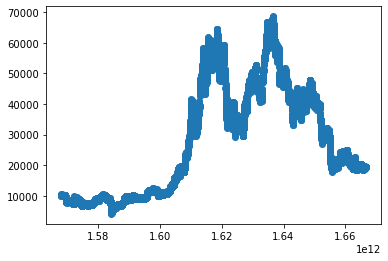

In [6]:
#a) Display a graph of price changes for the entire time 
#Your code:
df = pd.read_csv(getcwd() + "\klines_btcusdt_data.csv") # need to be __main__ file

fig, ax = plt.subplots()


ax.scatter(x = df['close_time'], y = df['close_price'])
plt.show()

#Hint plt.scatter

# Displaying the history of price 'BTC' changes

# Thanks to this chart, we can track how the price has changed over time
# Thanks to this, we can analyze how the market moved and at what prices it got stuck or slipped.

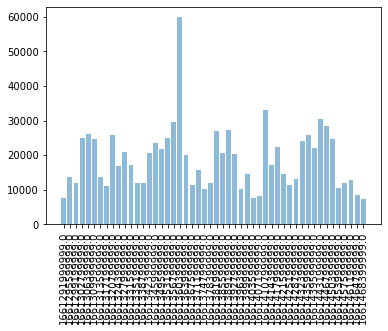

In [15]:
#b) Check trading volume
#Your code:
df = pd.read_csv(getcwd() + "\klines_btcusdt_data.csv") # need to be __main__ file

df_head = df.head(50)
y_pos = np.arange(len(df_head["volume"]))
plt.bar(y_pos, df_head["volume"], align='center', alpha=0.5)
plt.xticks(y_pos, df_head["close_time"], rotation=90)


plt.show()

# Trading volume in the last 50 hours
# Thanks to this chart, we can see the trading volume by the hour. 
# It is possible to identify trends at what time more is traded, to see abnormal volumes

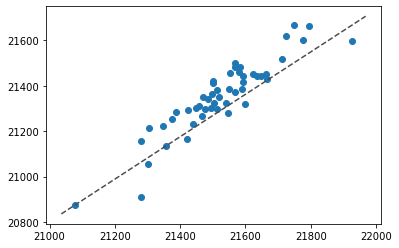

In [30]:
#c) Check the volatility 
#Your code:
df = pd.read_csv(getcwd() + "\klines_btcusdt_data.csv") # need to be __main__ file

fig, ax = plt.subplots()

df_head = df.head(50)

low_price = df_head["high_price"]
high_price = df_head["low_price"]

ax.scatter(low_price, high_price)
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
plt.show()

# Due to volatility, we can find out how much the price behaves unpredictably in a short period of time.

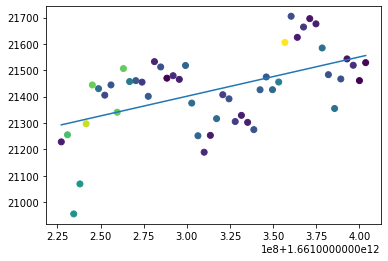

In [58]:
# Displays a graph of price changes. Draw a linear function of price change
#Your code:
df = pd.read_csv(getcwd() + "\klines_btcusdt_data.csv") # need to be __main__ file

fig, ax = plt.subplots()

df_head = df.head(50)

price = df_head["open_price"]
time = df_head["open_time"]
volume = df_head.loc[:,"volume"]

ax.scatter(time, price, c=volume)

z = np.polyfit(time,price,1)
p = np.poly1d(z)
plt.plot(time, p(time))


plt.show()

# Thanks to this chart, we can find out the trend of price changes (increase or decrease)

## Exercise 3
Display klines.

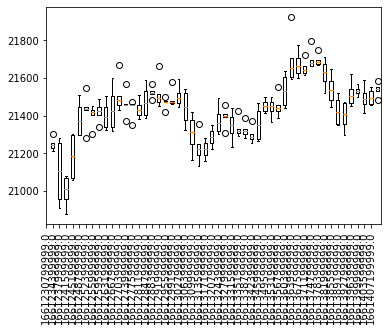

In [29]:
#a)Display klines.
#Your code:
df = pd.read_csv(getcwd() + "\klines_btcusdt_data.csv") # need to be __main__ file
df_head = df.head(50)

value = [list(x) for x in zip(df_head['open_price'], df_head['open_price'], df_head['high_price'], df_head['low_price'], df_head['close_price'], df_head['close_price'])]
# I duplicated 'open_price' and 'close_price' 2 times so that plt.boxplot() understand how to build klines.
y_pos = np.arange(len(value))

plt.boxplot(x = value)
plt.xticks(y_pos, df_head["close_time"], rotation=90)


plt.show()

#Hint: plt.boxplot

# Thanks to this chart, we can see how much the price has changed, analyze the shooting in any direction.

## Exercise 4
"I want to make money"
Find the price resistance levels

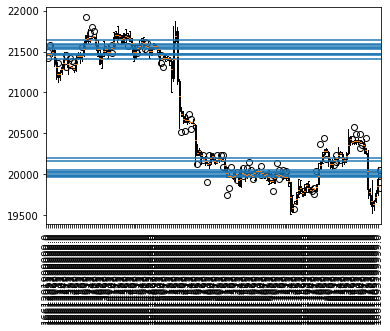

In [12]:
# Find the price resistance levels
#Your code:
df = pd.read_csv(getcwd() + "\klines_btcusdt_data.csv") # need to be __main__ file
df_head = df.head(168)


value = [list(x) for x in zip(df_head['open_price'], df_head['open_price'], df_head['high_price'], 
                              df_head['low_price'], df_head['close_price'], df_head['close_price'])]
# I duplicated 'open_price' and 'close_price' 2 times so that plt.boxplot() understand how to build klines.
y_pos = np.arange(len(value))

plt.boxplot(x = value)
plt.xticks(y_pos, df_head["close_time"], rotation=90)


volume = df_head.loc[:, "volume"].sort_values().index
density_lines = df_head.loc[volume,:].head(20)["open_price"]
for mass in density_lines: plt.axhline(mass)

plt.show()
#Hint: .loc, .sort_values(), .index
# Thanks to this chart, we can find resistance areas from which the price can probably push off, 
# or if there is a breakout, it probably won't come back.